# Section 16.7

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
sns.set(font_scale=2)

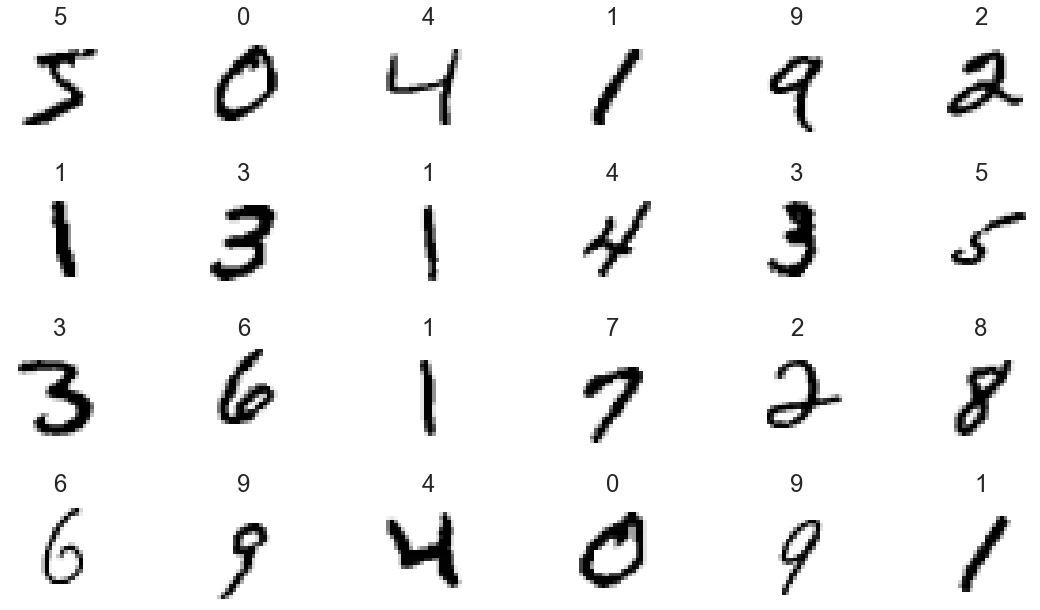

In [11]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [12]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_train = X_train.astype('float32') / 255

In [15]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [16]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_test = X_test.astype('float32') / 255

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train)

In [20]:
y_train.shape

(60000, 10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_test = to_categorical(y_test)

In [23]:
y_test.shape

(10000, 10)

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
cnn = Sequential()

In [26]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [27]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

In [28]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), activation='relu'))

In [29]:
cnn.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(3, 3), activation='relu'))

In [30]:
cnn.add(Flatten())

In [31]:
cnn.add(Dense(units=128, activation='relu'))

In [32]:
cnn.add(Dense(units=10, activation='softmax'))

In [33]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               524416    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 895,370
Trainable params: 895,370
Non-trainable params: 0
__________________________________________________

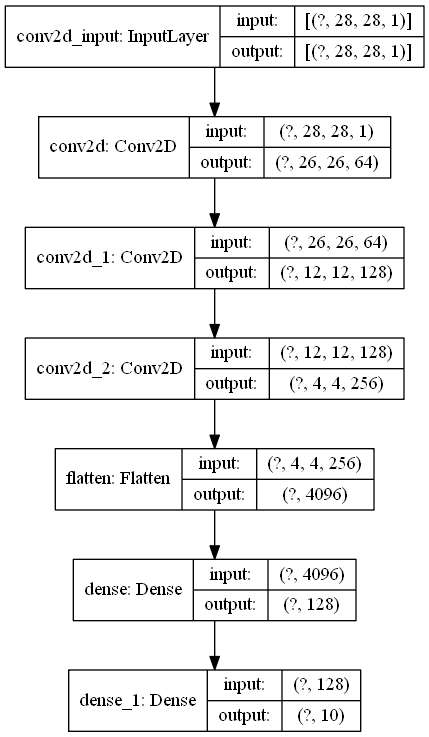

In [34]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png') 

In [35]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [36]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 155s 184ms/step - loss: 0.1506 - accuracy: 0.9535 - val_loss: 0.0545 - val_accuracy: 0.9835
Epoch 2/5
844/844 [==============================] - 151s 179ms/step - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.0565 - val_accuracy: 0.9853
Epoch 3/5
844/844 [==============================] - 145s 172ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.0501 - val_accuracy: 0.9857
Epoch 4/5
844/844 [==============================] - 148s 175ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.0482 - val_accuracy: 0.9875
Epoch 5/5
844/844 [==============================] - 148s 175ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0371 - val_accuracy: 0.9908


In [37]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0378 - accuracy: 0.9882 1s - loss:


In [38]:
loss

0.03783749043941498

In [39]:
accuracy

0.9882000088691711

In [40]:
predictions = cnn.predict(X_test)
len(predictions)

10000

In [41]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [42]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000009%
1: 0.0000000009%
2: 0.0000000904%
3: 0.0000015544%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000085%
9: 0.0000001409%


In [43]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [44]:
len(incorrect_predictions)

118

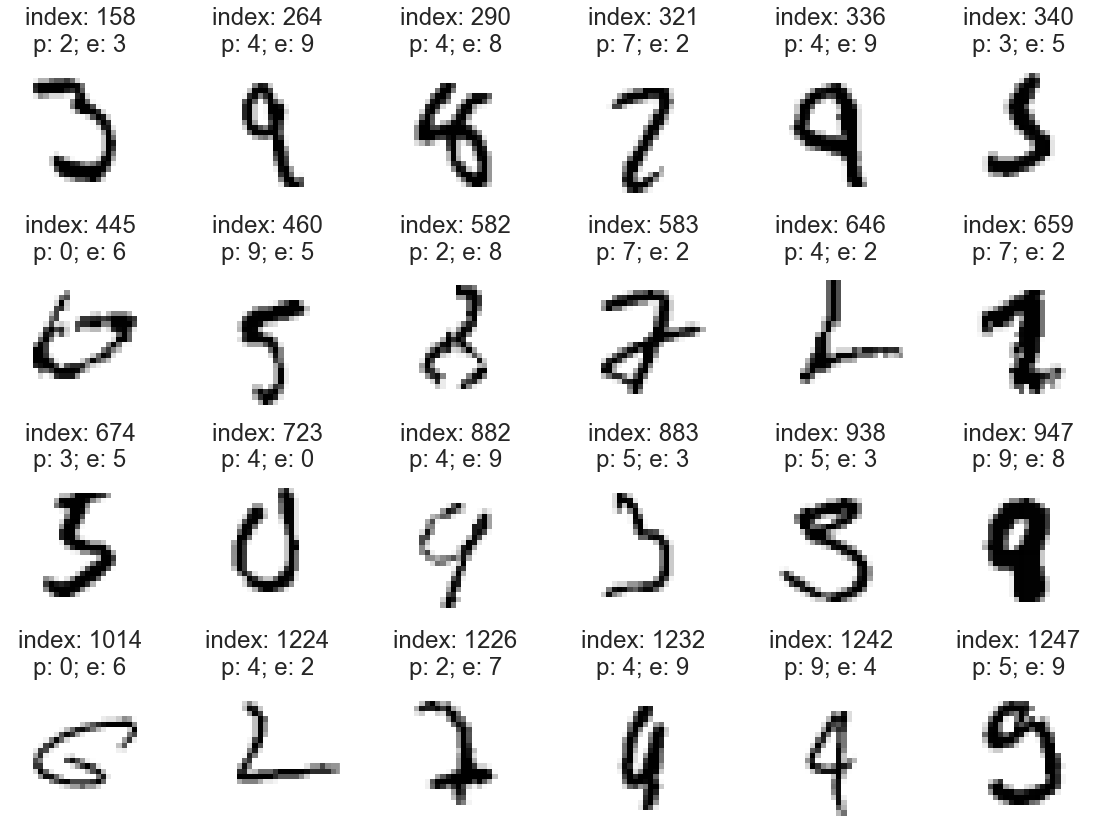

In [45]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [46]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [47]:
display_probabilities(predictions[495])

0: 0.1954054460%
1: 0.0000074164%
2: 7.5800329447%
3: 0.3950117156%
4: 0.0002963725%
5: 0.0000316999%
6: 0.1379155670%
7: 0.0000002276%
8: 91.6909217834%
9: 0.0003763032%


In [48]:
display_probabilities(predictions[583])

0: 0.0000000459%
1: 0.0005469488%
2: 19.9862495065%
3: 0.3585741390%
4: 0.0000006604%
5: 0.0000000093%
6: 0.0000000002%
7: 79.5977056026%
8: 0.0569263939%
9: 0.0000002475%


In [49]:
display_probabilities(predictions[625])

0: 0.0000122866%
1: 0.0000001023%
2: 0.0000671020%
3: 0.0000000003%
4: 34.7262650728%
5: 0.0000000036%
6: 65.2736485004%
7: 0.0000000000%
8: 0.0000000599%
9: 0.0000060500%


In [50]:
cnn.save('mnist_cnn.h5')

In [51]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################